## Python statistics essential training - 03_09_challenge

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

## Load info from mbox (a dictionary)

In [4]:
mails = mailbox.mbox('Starred.mbox')

In [8]:
mails[1].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'Received',
 'X-CSA-Complaints',
 'MIME-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'Date',
 'To',
 'From',
 'Reply-To',
 'Subject',
 'Feedback-ID',
 'List-Unsubscribe',
 'X-sgxh1',
 'X-rext',
 'X-cid',
 'X-rpcampaign',
 'Message-ID']

## Write information to csv

In [10]:
with open('StarredMail.csv','w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Subject','From','To','Date'])
    
    for m in mails:
        writer.writerow([m['Subject'],m['From'],m['To'],m['Date']])
        

## Read information to data frame

In [28]:
df = pd.read_csv('StarredMail.csv')

In [29]:
df.head()

,Subject,From,To,Date
0,application,Amelia Haiqiong Li <lhqkey@gmail.com>,Shunling GUO <shunling.guo@gmail.com>,"Tue, 11 Jun 2019 11:14:40 -0700"
1,Pop-In@Nordstrom Holidays featuring MoMA Desig...,"""NORDSTROM"" <nordstrom@em.NORDSTROM.com>",shunling.guo@gmail.com,"Fri, 17 Nov 2017 16:01:47 -0800"
2,Get Your Skin New Year Ready!,"""Kiehl's Since 1851"" <kiehls@mail.kiehls-usa.com>",<shunling.guo@gmail.com>,"Fri, 22 Dec 2017 10:12:39 -0600"
3,Welcome to your new Google Cloud account for a...,gsuite-noreply@google.com,shunling.guo@gmail.com,"Fri, 19 Jan 2018 03:58:41 +0000"
4,"30+ new Scientist jobs in Redwood City, CA",Indeed <alert@indeed.com>,shunling.guo@gmail.com,"Thu, 21 Dec 2017 22:23:18 -0600 (CST)"


In [30]:
def clean_mail(raw):
    match = re.search('<(.+)>',raw)
    if match:
        return match.group(1)
    else:
        return raw

In [35]:
From = df.From.apply(clean_mail)

In [36]:
To = df.To.apply(clean_mail)

In [43]:
cleanDF = pd.concat([From,To],axis=1)

In [45]:
cleanDF.head()

,From,To
0,lhqkey@gmail.com,shunling.guo@gmail.com
1,nordstrom@em.NORDSTROM.com,shunling.guo@gmail.com
2,kiehls@mail.kiehls-usa.com,shunling.guo@gmail.com
3,gsuite-noreply@google.com,shunling.guo@gmail.com
4,alert@indeed.com,shunling.guo@gmail.com


In [148]:
Date = df.Date.apply(lambda s: pd.to_datetime(s[0:31]))

In [151]:
def converttz(date):
    try:
        return date.tz_convert('UTC')
    except:
        print(date)
        return date.tz_localize('America/Los_Angeles').tz_convert('UTC')

In [152]:
Date = Date.apply(converttz)

2014-06-12 19:16:12


In [153]:
Date.head()

0   2019-06-11 18:14:40+00:00
1   2017-11-18 00:01:47+00:00
2   2017-12-22 16:12:39+00:00
3   2018-01-19 03:58:41+00:00
4   2017-12-22 04:23:18+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [171]:
Date.min(),Date.max(),Date.count()

(Timestamp('2012-01-11 01:18:03+0000', tz='UTC'),
 Timestamp('2019-07-29 15:12:56+0000', tz='UTC'),
 373)

In [167]:
cleanDF = pd.concat([cleanDF,Date],axis=1)
cleanDF.head()

,From,To,Date
0,lhqkey@gmail.com,shunling.guo@gmail.com,2019-06-11 18:14:40+00:00
1,nordstrom@em.NORDSTROM.com,shunling.guo@gmail.com,2017-11-18 00:01:47+00:00
2,kiehls@mail.kiehls-usa.com,shunling.guo@gmail.com,2017-12-22 16:12:39+00:00
3,gsuite-noreply@google.com,shunling.guo@gmail.com,2018-01-19 03:58:41+00:00
4,alert@indeed.com,shunling.guo@gmail.com,2017-12-22 04:23:18+00:00


In [168]:
cleanDF['dayofweek'] = pd.Categorical(Date.dt.weekday_name,
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

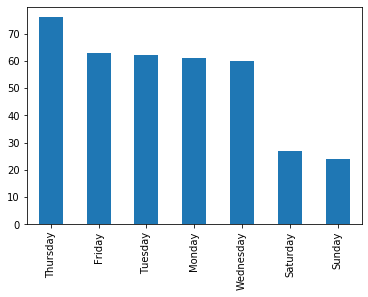

In [174]:
cleanDF.dayofweek.value_counts().plot(kind='bar')

## Challenge: distribution by hour separately for each day and then overlay the plot for each day

msg.group(0)